In [2]:
from math import sqrt, log, log10, exp

import numpy as np

#remove below all matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline 

import dataset
import perf
import sgd

from importlib import reload
reload(dataset)
reload(perf)
reload(sgd)

%matplotlib inline  

In [3]:
features = ['HAB_nb_pieces', 'POL_mtcapass', 'CLI_age', 'ddea_quant_freq_20', 'HAB_qual', 'HAB_habit', 'HAB_qual_inhab' ]

In [5]:
i, intercept, coeffs, l, errors = sgd.fit_online('c:/data/axaf_mrh_appt.csv', features, 'nbsinDDE', 
                                                 exposure='anpol', family='poisson',  
                                                 average_size=100000, p1=0, nb_adaptative_steps=1)

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'c:/data/axaf_mrh_appt.csv\\data'

In [61]:
coeffs_n = np.array(coeffs) / np.array([15.0, 619700.0, 141, 20, 1, 1, 3])
print('nb: ', i, '\n')
print('intercept: ', intercept, '\n')
print("==Coeffs==")
print('\n'.join(list(map(str, zip(features, coeffs_n)))))
print('')
print("==Multiplicative Coeffs==")
print('\n'.join(list(map(str, zip(features, np.exp(coeffs_n))))))

nb:  110000 

intercept:  -4.20102003653 

==Coeffs==
('HAB_nb_pieces', 0.15959395192707557)
('POL_mtcapass', 1.2545319259265692e-06)
('CLI_age', -0.0018558241600572989)
('ddea_quant_freq_20', 0.090958867066736476)
('HAB_qual', -0.44669263885176358)
('HAB_habit', -0.17157186277765177)
('HAB_qual_inhab', -0.092239488650673648)

==Multiplicative Coeffs==
('HAB_nb_pieces', 1.17303446589232)
('POL_mtcapass', 1.0000012545327128)
('CLI_age', 0.99814589681682442)
('ddea_quant_freq_20', 1.0952239545581066)
('HAB_qual', 0.63974050943702754)
('HAB_habit', 0.84233973297200415)
('HAB_qual_inhab', 0.91188673686827593)


In [63]:
def predict(filename, size, intercept, coeffs, features, target, exposure=None, family=None):
    dataset_iterator = sgd.dataset_iterator(filename, size, features, target, exposure=exposure)
    y_list = np.zeros(size)
    pred = np.zeros(size)
    for i, values in enumerate(dataset_iterator):
        x, y, exposure = values
        if family == 'poisson':
            pred[i] = exp(np.inner(coeffs, x) + intercept) * exposure
        else:
            pred[i] = np.inner(coeffs, x) + intercept
        y_list[i] = y
    return (y_list, pred)

y, y_hat = predict('c:/data/axaf_mrh_appt.csv', 4459542, intercept, coeffs, features, 'nbsinDDE', exposure='anpol', family='poisson')
exposure = dataset.Dataset('c:/data/axaf_mrh_appt.csv').get_column('anpol')

Skip feature:  newid
normalize  HAB_nb_pieces  by:  1.0
normalize  POL_mtcapass  by:  1.0
normalize  CLI_age  by:  1.0
normalize  ddea_quant_freq_20  by:  1.0
normalize  HAB_qual  by:  1.0
normalize  HAB_habit  by:  1.0
normalize  HAB_qual_inhab  by:  1.0
Skip feature:  newid


minimum achieved at : 29758
lambda :  0.055
error :  0.0300365677653
110000 th iteration
intercept :  -4.20102003653
Trailing error :  [ 0.0818097]
NB of non null coefficients :  3
Sum of log10 abs error :  -1.1581464316071903


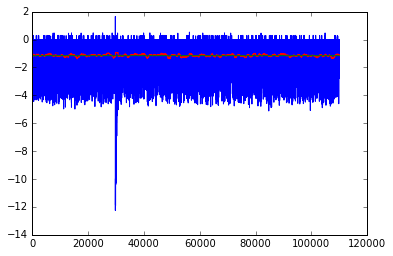

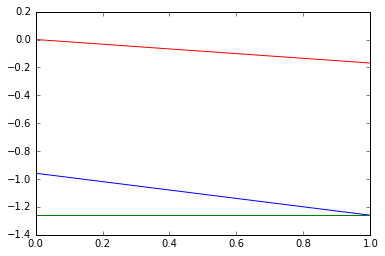

In [64]:
trailing_errors = moving_average(errors, 1000)

print('minimum achieved at :', np.argmin(errors))
print('lambda : ', l[-1])
print('error : ', errors[-1])
print(i, 'th iteration')
print('intercept : ', intercept)
print('Trailing error : ', trailing_errors[-1:])
print('NB of non null coefficients : ', np.count_nonzero(np.greater(coeffs, 0.01)))
e = perf.mean_absolute_error(y_hat, y)
print("Sum of log10 abs error : ", log10(e))

 

In [65]:
perf.root_mean_square_error(y, y_hat)

0.20037238755045031

In [66]:
perf.deviance(y, y_hat)

1032566.1738114534

In [67]:
perf.explained_deviance_ratio(y, y_hat)

0.095886029190491051

In [1]:
perf.plot_gini(y_hat, exposure)
print('Gini: ', perf.gini(y_hat, exposure))
print('Gini saturé: ', perf.saturated_gini(y, y_hat, exposure))

NameError: name 'perf' is not defined

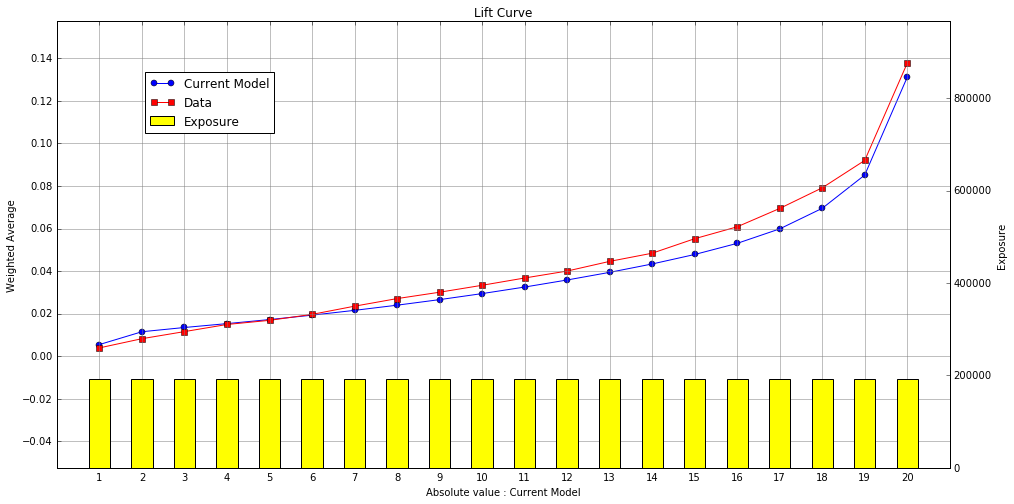

In [47]:
perf.plot_lift_curve(y, y_hat, exposure, 20)

Skip feature:  newid


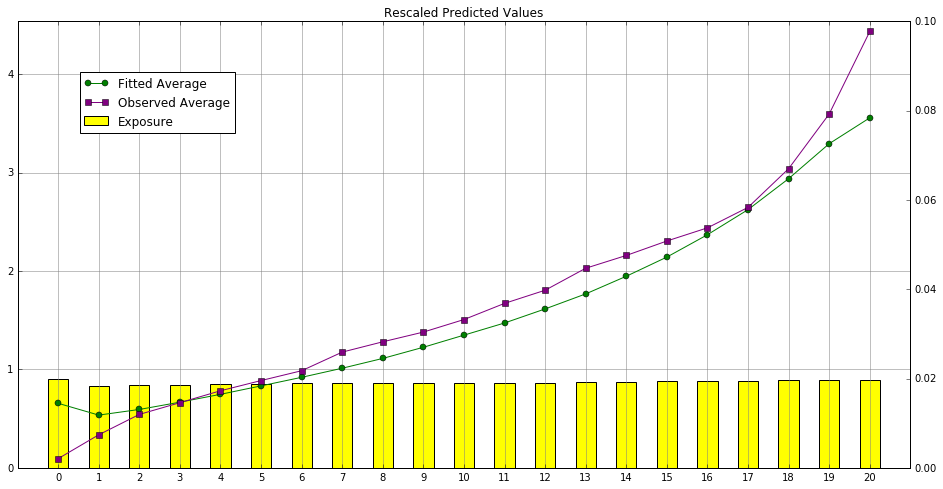

In [48]:
feature = dataset.Dataset('c:/data/axaf_mrh_appt.csv').get_column('ddea_quant_freq_20') * 20
perf.plot_rescaled_predicted_values(feature, y_hat, y, exposure)